## ** The Improved Power Disaggregation (Non-intrusive Load Monitoring) **

- Author : Gyubaek Kim (database.kim@yonsei.ac.kr)
- Description
  * Pre-verification for checking whether the appliance's electricity consumption is in consistent. Dynamic time warping (DTW) is used for checking similarity between electricity consumption by appliances.
- License
   * All rights reserved. No part of this code may be reproduced or transmitted in any form or by any means, or utilized by any information storage and retrieval system without written permission from the copyright owner. You can use this source code for free projects only. I will not allow commercial use of this code. I am not allowing anyone to modify any or all parts of the source code for commercial purposes. By using my source code, you agree to the following: 
       * 1. You will not distribute any or all parts of this source code for commercial use 
       * 2. You will cite me as the original creator of this source code. 
       * 3. You will inform me of its use before you use any or all parts of this source code. 
   For use of any or all parts of this source code, email me. This source code is provided free to use for everybody provided this is used non-commercially. Violators of this agreement will be subject to legal action by the author. If you see commercial applications or software using any or all parts of this source code, inform me.  

In [18]:
#### NIMLTK as common framework ####
from nilmtk.utils import find_nearest
from nilmtk.feature_detectors import cluster
from nilmtk.legacy.disaggregate import Disaggregator
from nilmtk.datastore import HDFDataStore
from nilmtk import DataSet

#### Our Model ####
from work.dtdisaggregator import DTDisaggregator
from work.utils import checkSimilarity

import pandas as pd
import numpy as np
import h5py
import numpy.random
import time
import datetime
import math
import itertools
import warnings

from scipy.signal import find_peaks

from matplotlib import rcParams
import matplotlib.pyplot as plt

numpy.random.seed(42)
warnings.filterwarnings('ignore')

%matplotlib inline
rcParams['figure.figsize'] = (23, 10)

In [19]:
dataset = DataSet('../enertalk/enertalk-converted/enertalk.h5')

## Inter-similarity Check

- Description
  The similarities between energy consumption patterns of different instances of the same type of appliance were checked because, if they 
  had similar energy consumption patterns, it would be possible to build a general disaggregation model for that type of appliance. Otherwise, disaggregation 
  models for the appliance in question would have to be separately developed for each house.

In [20]:
def getMeterData(home_id, appliance_name):
    
    print("*"*20)
    print("[" + str(home_id) + "] - [" + appliance_name + "]") 
    print("*" *20)
    
    train_elec = dataset.buildings[home_id].elec
    
    train_meter = train_elec.submeters()[appliance_name]
    
    meter_power_series = train_meter.power_series(sample_period=1)
    meterchunk = next(meter_power_series)
    meterchunk.fillna(0, inplace=True)
    
    meterchunk.plot()
    plt.show()
    
    return meterchunk

In [21]:
# enertalk.set_window(start='2017-01-01 00:00:00', end='2017-01-15 00:00:00')
# 1, 2, 9, 10, 13, 14, 18, 22

# enertalk.set_window(start='2016-10-01 00:00:00', end='2016-10-15 00:00:00')
# 3, 5, 6

# enertalk.set_window(start='2017-04-01 00:00:00', end='2017-04-15 00:00:00')
# 12, 21

# no rice cooker
# 4, 7, 8, 11, 15, 16, 17, 19, 20

#i_list = [1, 2, 3, 5, 6, 9, 10, 12, 13, 14, 18, 21, 22]

********************
[1] - [rice cooker]
********************


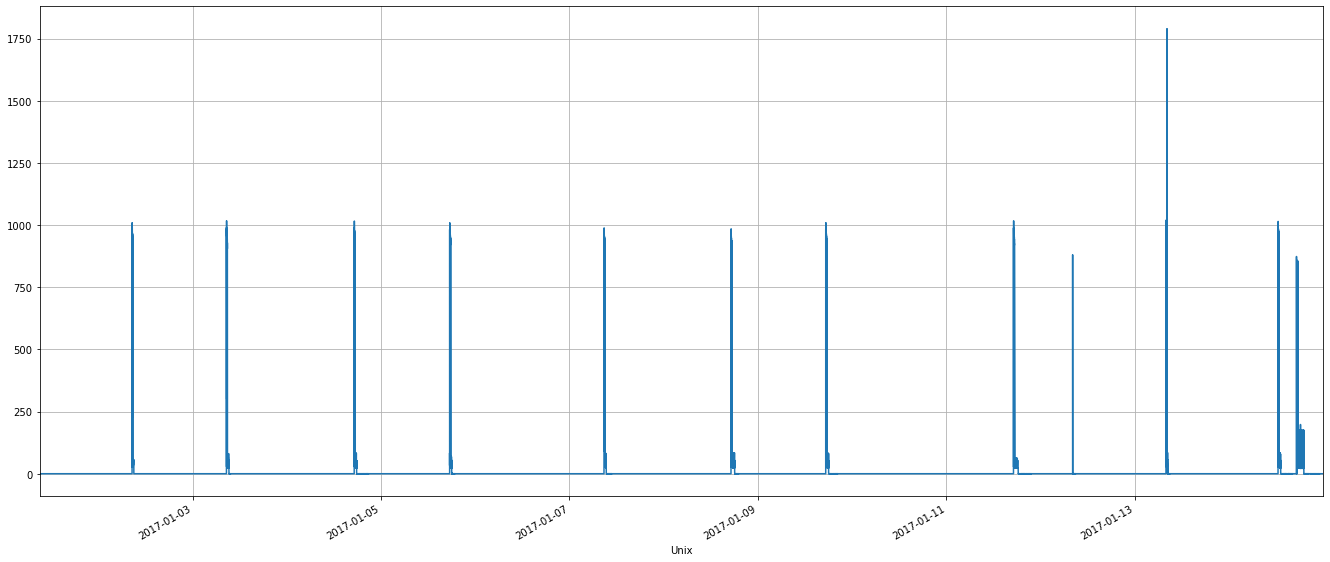

********************
[2] - [rice cooker]
********************


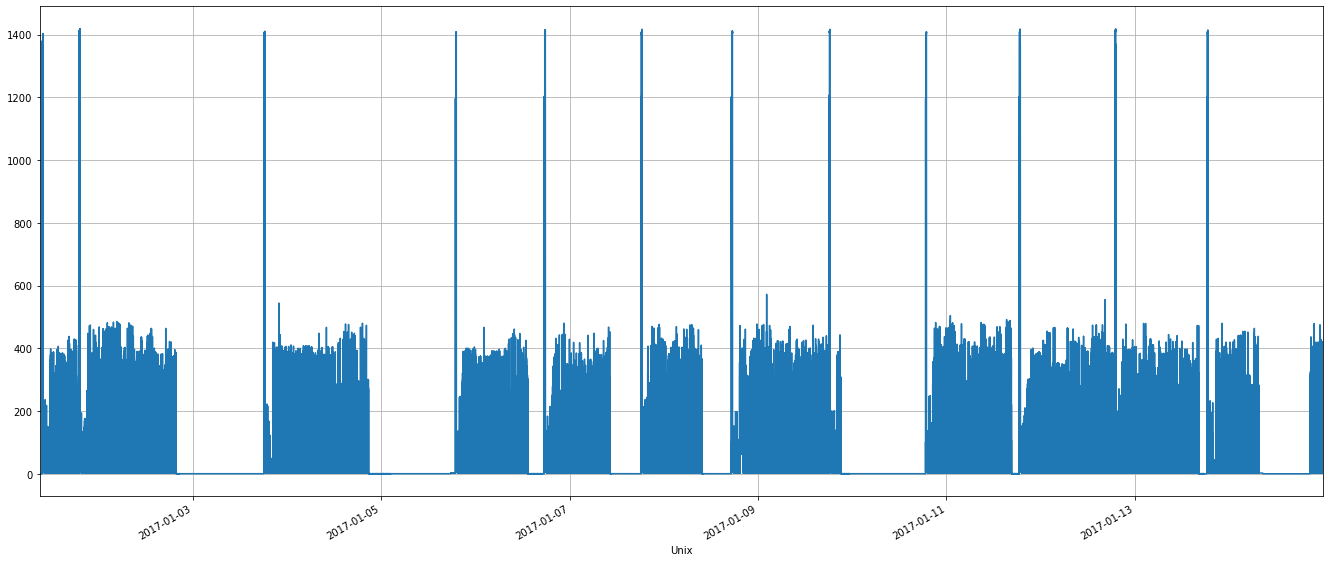

********************
[9] - [rice cooker]
********************


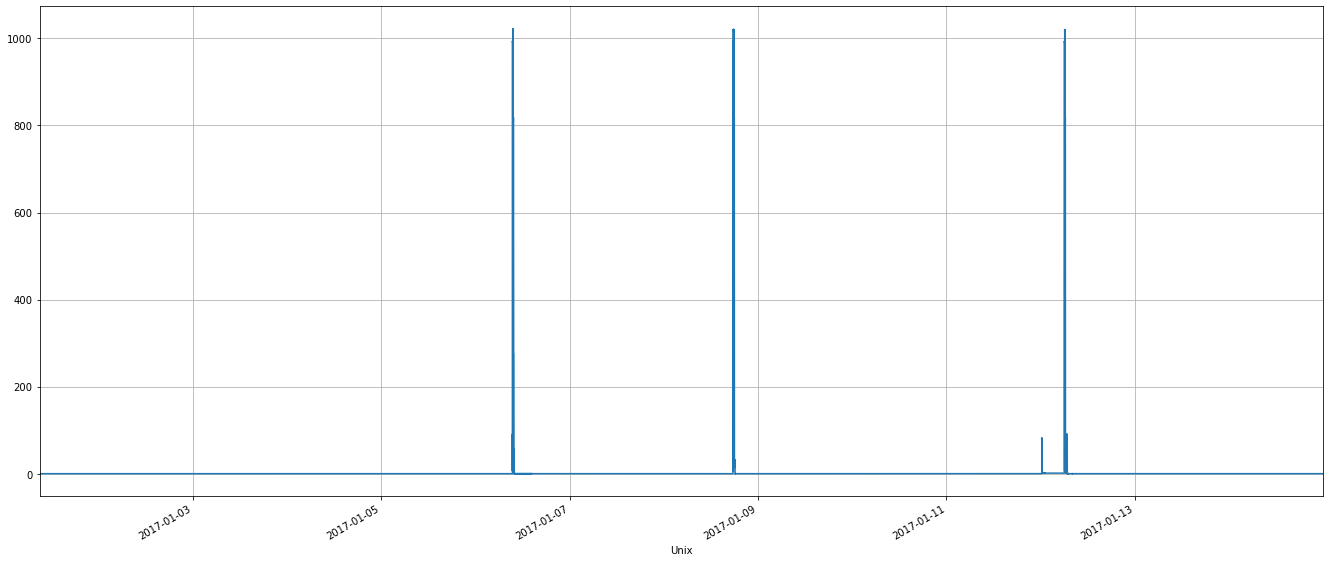

********************
[10] - [rice cooker]
********************


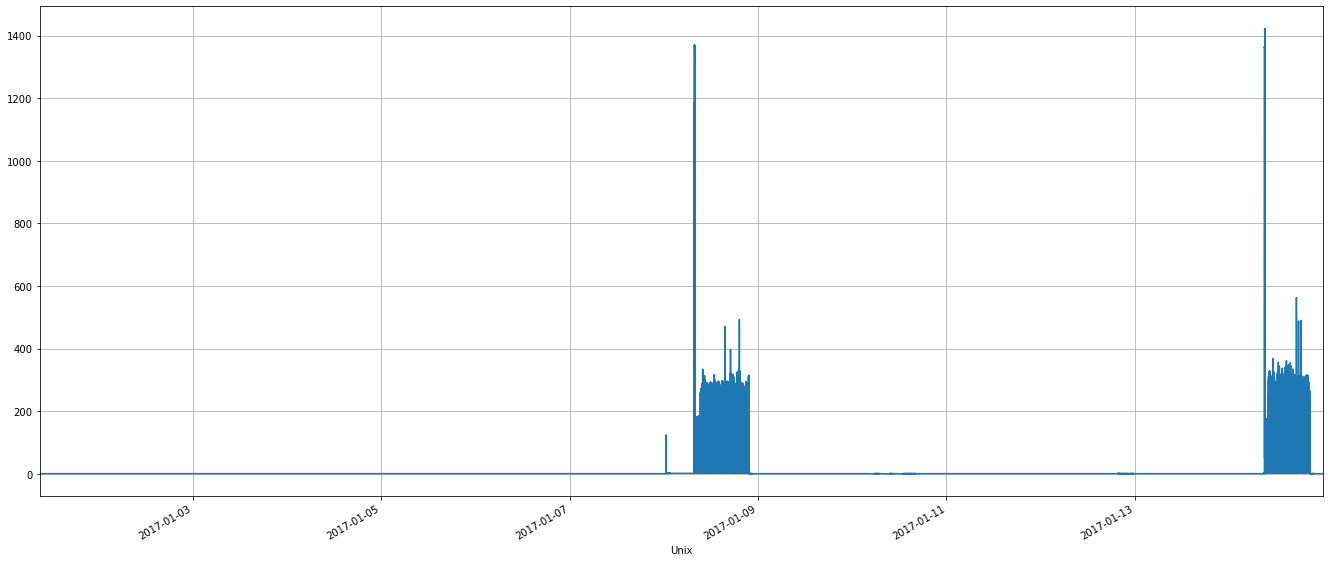

********************
[13] - [rice cooker]
********************


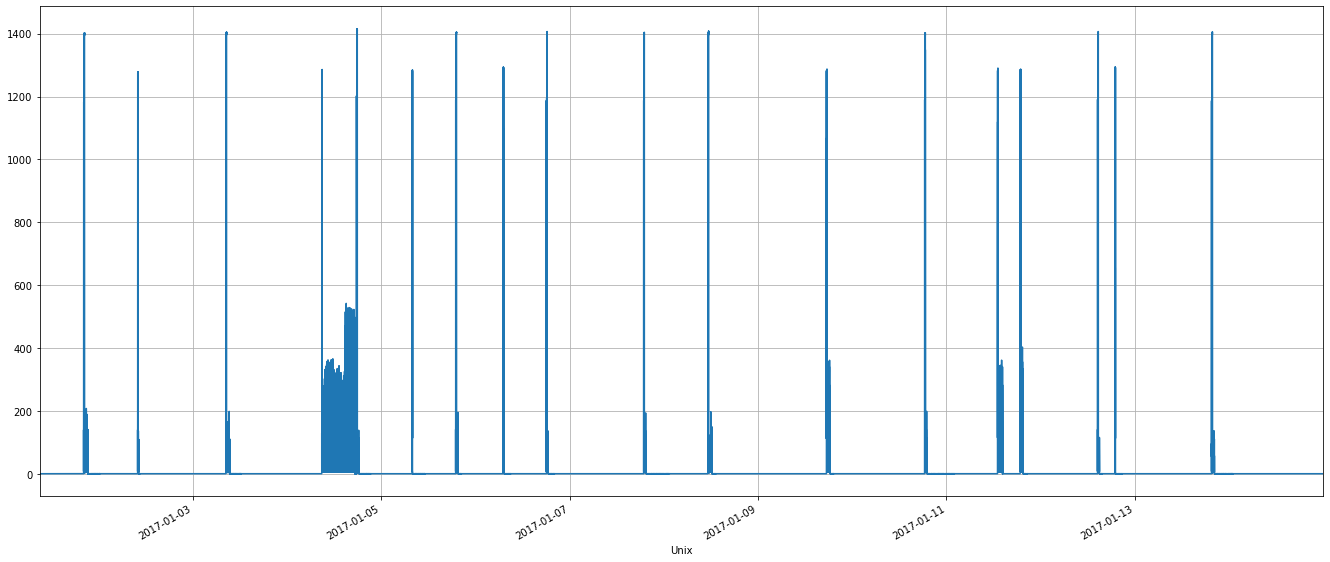

********************
[14] - [rice cooker]
********************


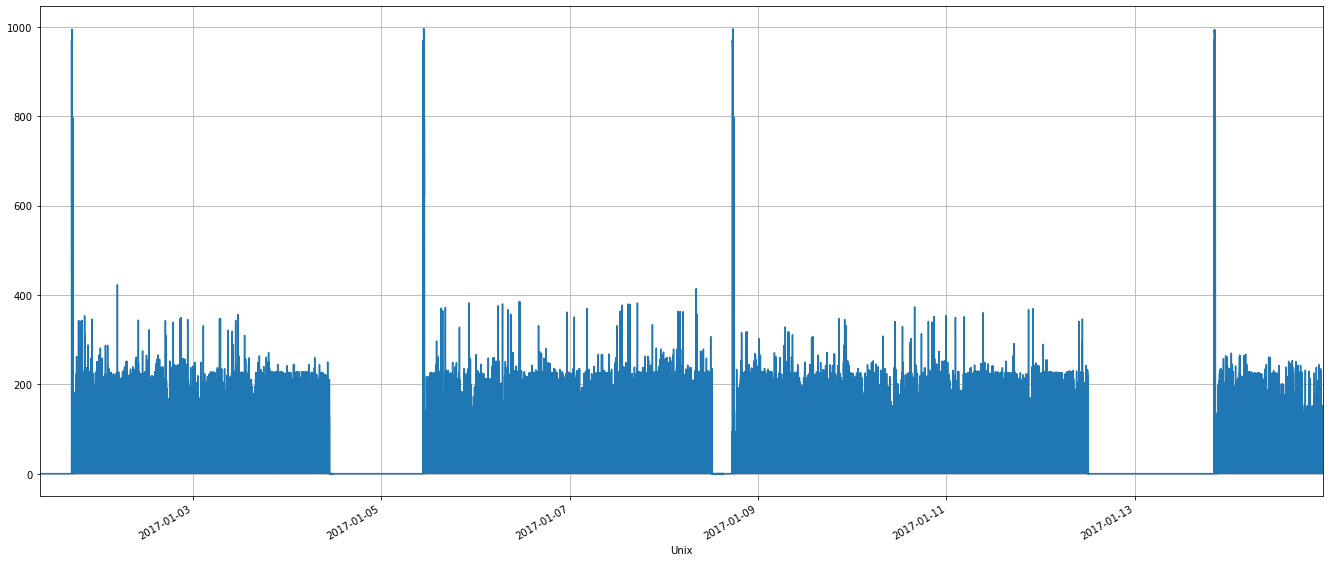

********************
[18] - [rice cooker]
********************


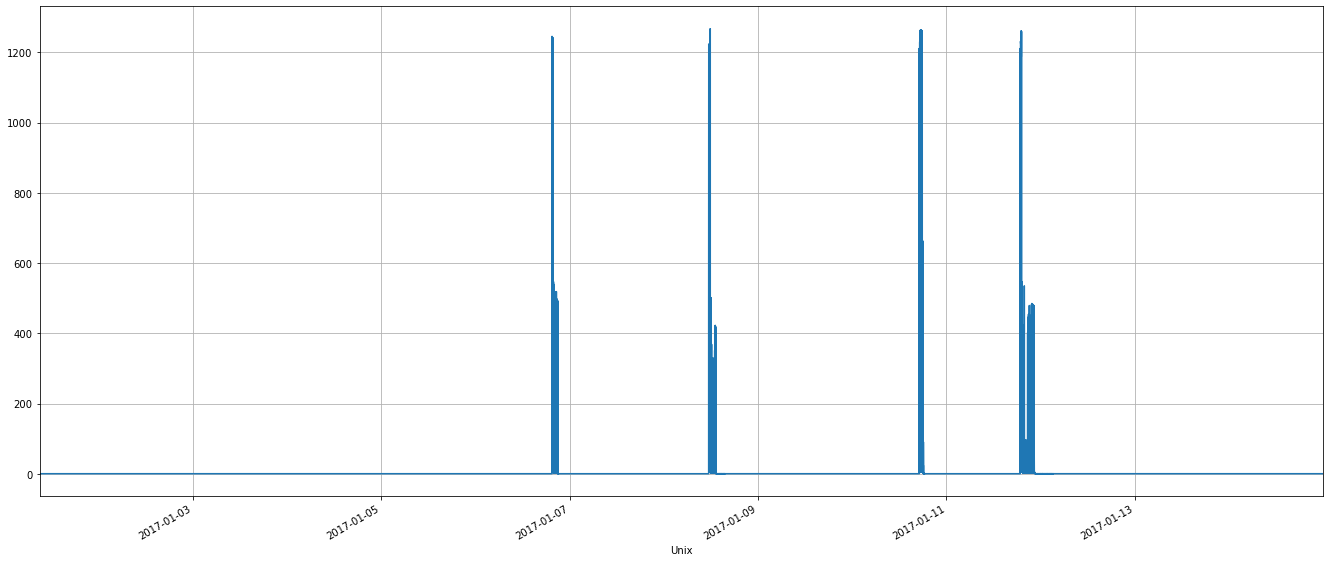

********************
[22] - [rice cooker]
********************


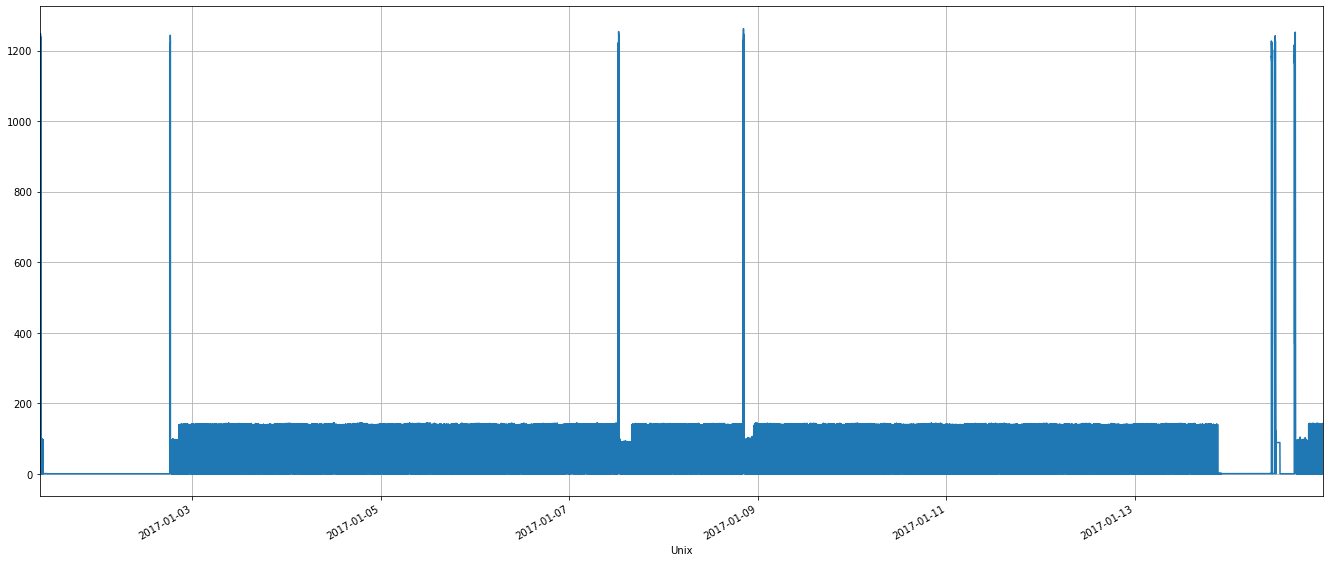

********************
[3] - [rice cooker]
********************


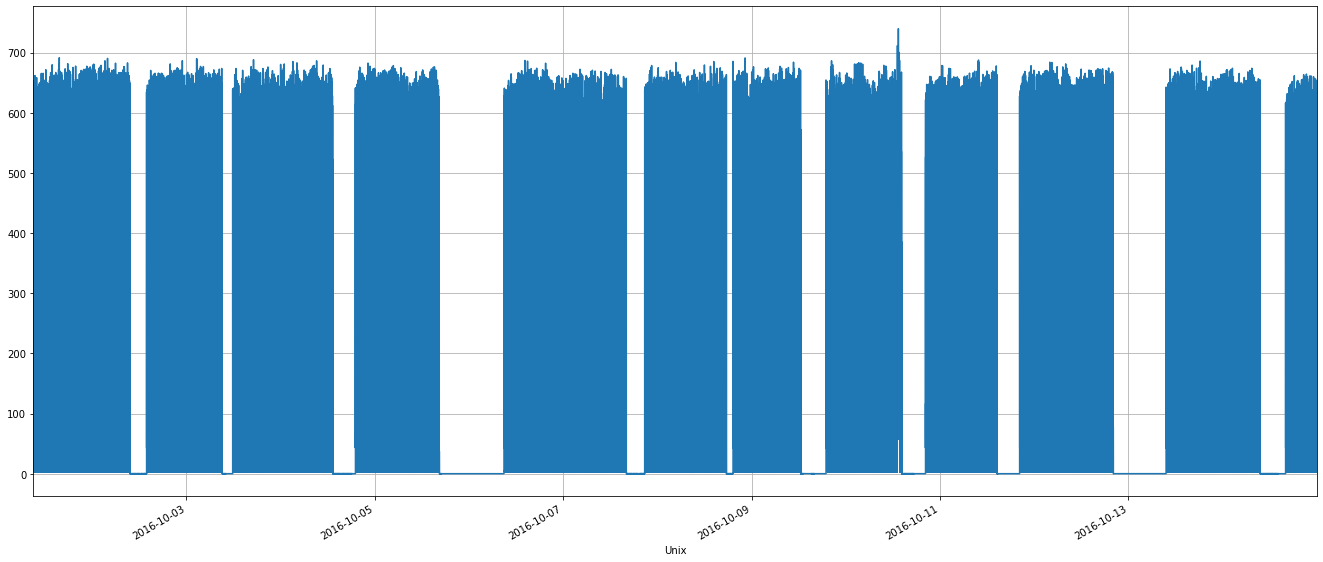

********************
[5] - [rice cooker]
********************


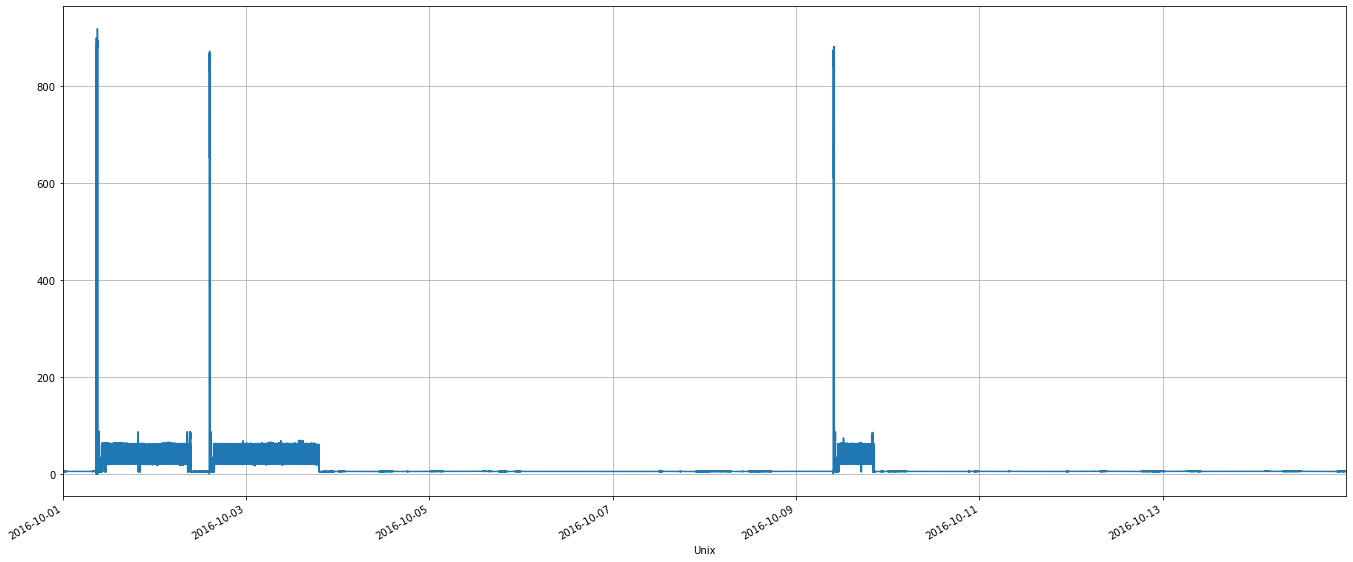

********************
[6] - [rice cooker]
********************


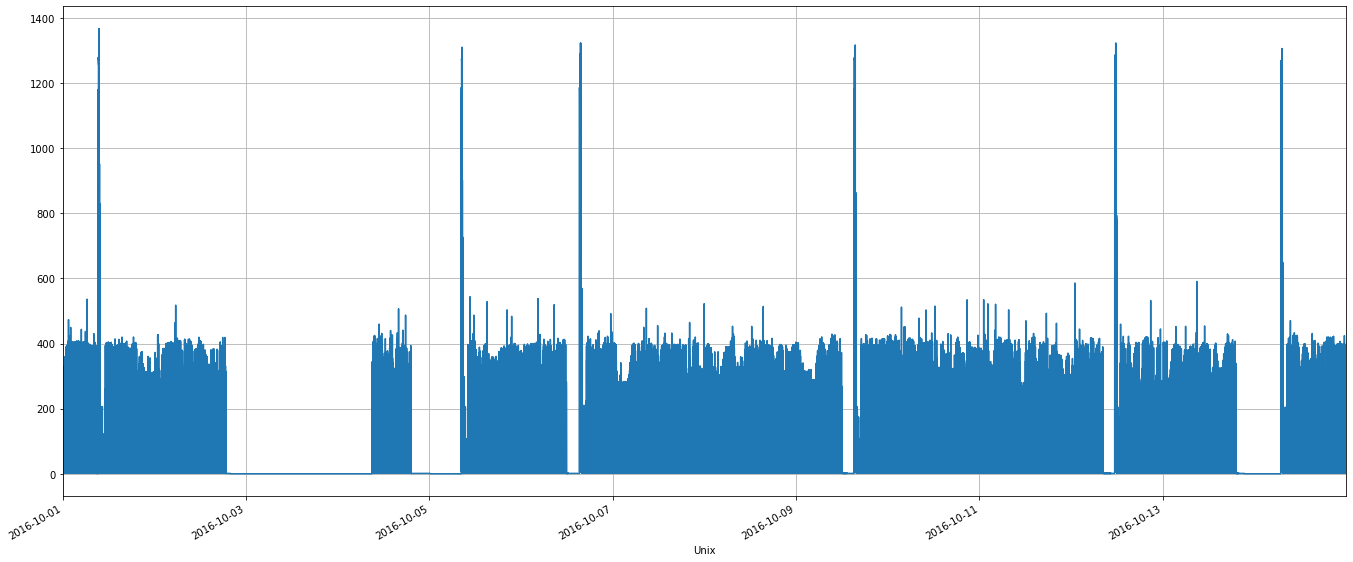

********************
[12] - [rice cooker]
********************


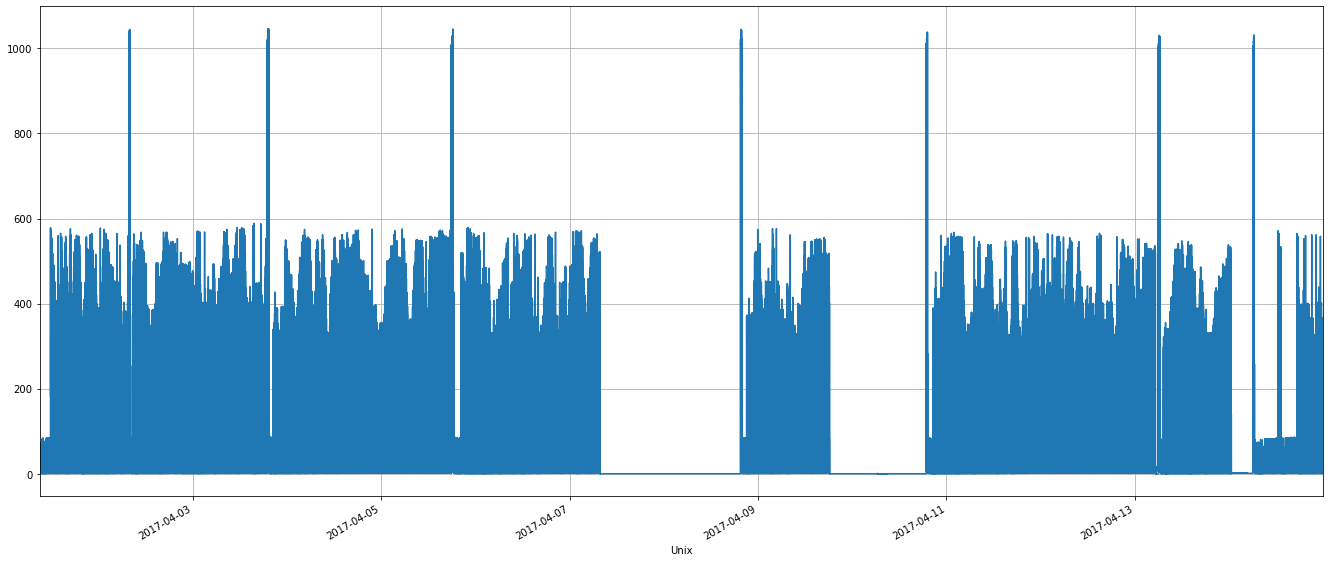

********************
[21] - [rice cooker]
********************


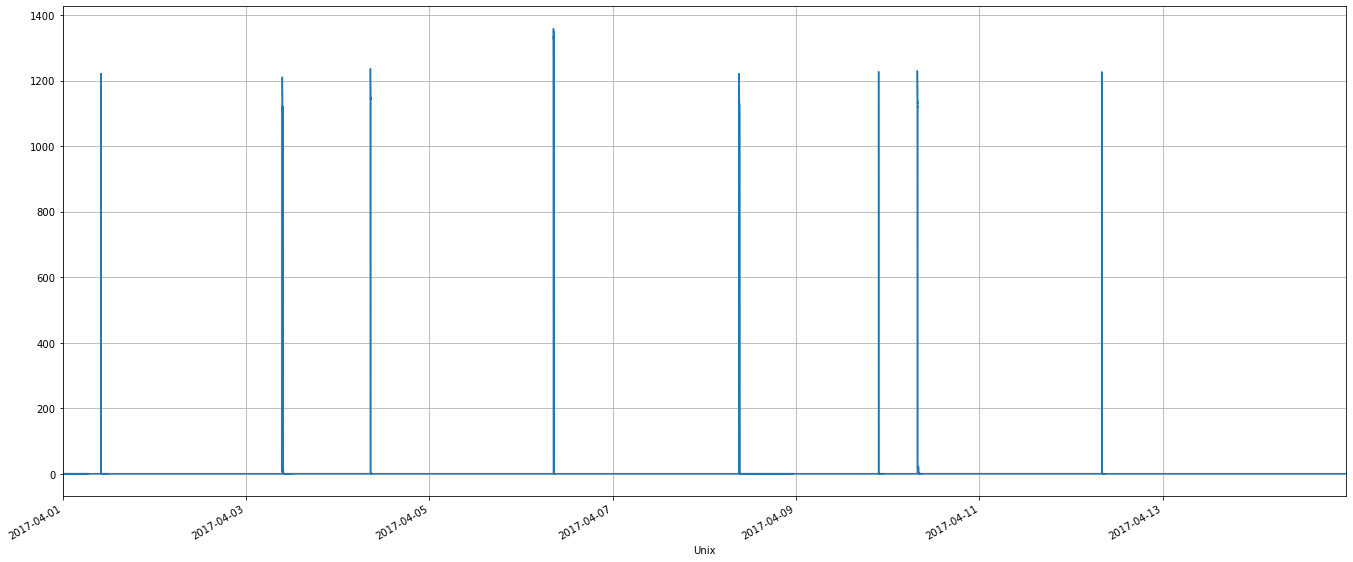

'Baseline = 11.37'

'[Average] : 1.49'

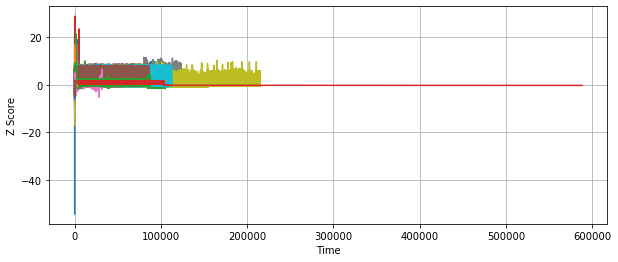

Done


In [22]:
dataset.set_window(start='2017-01-01 00:00:00', end='2017-01-15 00:00:00')

# rice cooker
rc = []
rc.append(getMeterData(1, "rice cooker"))
rc.append(getMeterData(2, "rice cooker"))
rc.append(getMeterData(9, "rice cooker"))
rc.append(getMeterData(10, "rice cooker"))
rc.append(getMeterData(13, "rice cooker"))
rc.append(getMeterData(14, "rice cooker"))
rc.append(getMeterData(18, "rice cooker"))
rc.append(getMeterData(22, "rice cooker"))

dataset.set_window(start='2016-10-01 00:00:00', end='2016-10-15 00:00:00')
rc.append(getMeterData(3, "rice cooker"))
rc.append(getMeterData(5, "rice cooker"))
rc.append(getMeterData(6, "rice cooker"))


dataset.set_window(start='2017-04-01 00:00:00', end='2017-04-15 00:00:00')
rc.append(getMeterData(12, "rice cooker"))
rc.append(getMeterData(21, "rice cooker"))

checkSimilarity(rc, False) 